<br>

## **Step 1: Import**

In [1]:
from torchvision import transforms
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import matplotlib.pyplot as plt

In [2]:
# for reproducibility

torch.manual_seed(42)

<br>

## **Step 2: Read colour image**

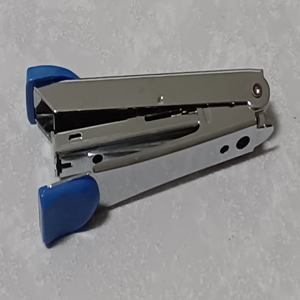

In [3]:
image_colour = Image.open('image_stapler.jpg').resize((300,300))
image_colour

In [4]:
image_colour.size

(300, 300)

<br>

## **Step 3: Transform colour image to grayscale**

In [5]:
transform_grayscale = transforms.Grayscale()

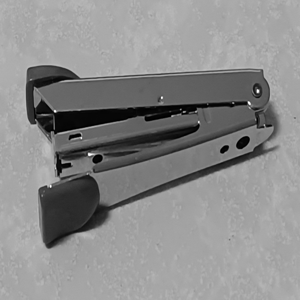

In [6]:
image_grayscale = transform_grayscale(image_colour)
image_grayscale

In [7]:
image_grayscale.size

(300, 300)

<br>

## **Step 4a: Transform colour image to tensor and vice versa**

In [8]:
to_tensor = transforms.ToTensor()

In [9]:
image_colour_tensor = to_tensor(image_colour)
image_colour_tensor

tensor([[[0.6745, 0.6824, 0.6784,  ..., 0.6627, 0.6588, 0.6627],
         [0.6667, 0.6706, 0.6706,  ..., 0.6706, 0.6627, 0.6667],
         [0.6745, 0.6667, 0.6784,  ..., 0.6863, 0.6745, 0.6706],
         ...,
         [0.6706, 0.6627, 0.6549,  ..., 0.6745, 0.6863, 0.7020],
         [0.6588, 0.6588, 0.6588,  ..., 0.6745, 0.6863, 0.6941],
         [0.6549, 0.6588, 0.6588,  ..., 0.6706, 0.6824, 0.6863]],

        [[0.6667, 0.6745, 0.6706,  ..., 0.6588, 0.6549, 0.6588],
         [0.6588, 0.6627, 0.6627,  ..., 0.6667, 0.6588, 0.6627],
         [0.6667, 0.6588, 0.6706,  ..., 0.6824, 0.6706, 0.6667],
         ...,
         [0.6627, 0.6549, 0.6471,  ..., 0.6706, 0.6824, 0.6980],
         [0.6510, 0.6510, 0.6510,  ..., 0.6706, 0.6824, 0.6902],
         [0.6471, 0.6510, 0.6510,  ..., 0.6667, 0.6784, 0.6824]],

        [[0.6706, 0.6784, 0.6745,  ..., 0.6510, 0.6471, 0.6510],
         [0.6627, 0.6667, 0.6667,  ..., 0.6588, 0.6510, 0.6549],
         [0.6706, 0.6627, 0.6745,  ..., 0.6745, 0.6627, 0.

In [10]:
image_colour_tensor.size()

torch.Size([3, 300, 300])

**You will see 3 channels**

**This is how to transform tensor back to image**

In [11]:
transform_image = transforms.ToPILImage()

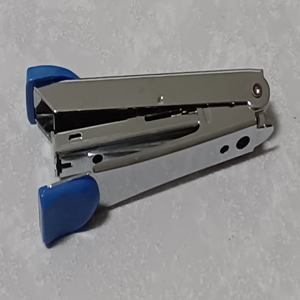

In [12]:
plotted_image = transform_image(image_colour_tensor)
plotted_image

<br>

## **Step 4b: Transform grayscale image to tensor and vice versa**

In [13]:
image_grayscale_tensor = to_tensor(image_grayscale)
image_grayscale_tensor

tensor([[[0.6706, 0.6784, 0.6745,  ..., 0.6588, 0.6549, 0.6588],
         [0.6627, 0.6667, 0.6667,  ..., 0.6667, 0.6588, 0.6627],
         [0.6706, 0.6627, 0.6745,  ..., 0.6824, 0.6706, 0.6667],
         ...,
         [0.6667, 0.6588, 0.6510,  ..., 0.6706, 0.6824, 0.6980],
         [0.6549, 0.6549, 0.6549,  ..., 0.6706, 0.6824, 0.6902],
         [0.6510, 0.6549, 0.6549,  ..., 0.6667, 0.6784, 0.6824]]])

In [14]:
image_grayscale_tensor.size()

torch.Size([1, 300, 300])

**You will see 1 channel**

**This is how to transform tensor back to image**

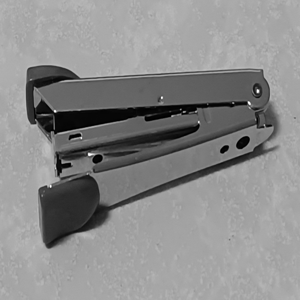

In [15]:
plotted_image = transform_image(image_grayscale_tensor)
plotted_image

<br>

## **Step 4c: Transform image to tensor from 0 to 255 instead of from 0 to 1**

**Grayscale**

In [16]:
image_grayscale_array = np.array(image_grayscale)
image_grayscale_array

array([[171, 173, 172, ..., 168, 167, 168],
       [169, 170, 170, ..., 170, 168, 169],
       [171, 169, 172, ..., 174, 171, 170],
       ...,
       [170, 168, 166, ..., 171, 174, 178],
       [167, 167, 167, ..., 171, 174, 176],
       [166, 167, 167, ..., 170, 173, 174]], dtype=uint8)

In [17]:
image_grayscale_array.shape

(300, 300)

**Shape is wrong. Shape should be (1,300,300).**

In [18]:
image_grayscale_array_tensor = torch.tensor(image_grayscale_array, dtype=torch.uint8).unsqueeze(dim=0)
image_grayscale_array_tensor

tensor([[[171, 173, 172,  ..., 168, 167, 168],
         [169, 170, 170,  ..., 170, 168, 169],
         [171, 169, 172,  ..., 174, 171, 170],
         ...,
         [170, 168, 166,  ..., 171, 174, 178],
         [167, 167, 167,  ..., 171, 174, 176],
         [166, 167, 167,  ..., 170, 173, 174]]], dtype=torch.uint8)

In [19]:
image_grayscale_array_tensor.shape

torch.Size([1, 300, 300])

**Shape is corrected now.**

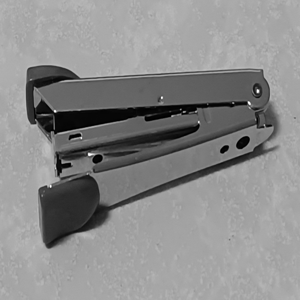

In [20]:
plotted_image = transform_image(image_grayscale_array_tensor)
plotted_image

**Colour**

In [21]:
image_colour_array = np.array(image_colour)
image_colour_array

array([[[172, 170, 171],
        [174, 172, 173],
        [173, 171, 172],
        ...,
        [169, 168, 166],
        [168, 167, 165],
        [169, 168, 166]],

       [[170, 168, 169],
        [171, 169, 170],
        [171, 169, 170],
        ...,
        [171, 170, 168],
        [169, 168, 166],
        [170, 169, 167]],

       [[172, 170, 171],
        [170, 168, 169],
        [173, 171, 172],
        ...,
        [175, 174, 172],
        [172, 171, 169],
        [171, 170, 168]],

       ...,

       [[171, 169, 170],
        [169, 167, 168],
        [167, 165, 166],
        ...,
        [172, 171, 170],
        [175, 174, 172],
        [179, 178, 176]],

       [[168, 166, 167],
        [168, 166, 167],
        [168, 166, 167],
        ...,
        [172, 171, 169],
        [175, 174, 172],
        [177, 176, 174]],

       [[167, 165, 166],
        [168, 166, 167],
        [168, 166, 167],
        ...,
        [171, 170, 168],
        [174, 173, 171],
        [175, 174, 172]]

In [22]:
image_colour_array.shape

(300, 300, 3)

**Shape is wrong. Shape should be (3,300,300).**

In [23]:
image_colour_array_tensor = torch.tensor(image_colour_array, dtype=torch.uint8).permute(2,0,1)
image_colour_array_tensor

tensor([[[172, 174, 173,  ..., 169, 168, 169],
         [170, 171, 171,  ..., 171, 169, 170],
         [172, 170, 173,  ..., 175, 172, 171],
         ...,
         [171, 169, 167,  ..., 172, 175, 179],
         [168, 168, 168,  ..., 172, 175, 177],
         [167, 168, 168,  ..., 171, 174, 175]],

        [[170, 172, 171,  ..., 168, 167, 168],
         [168, 169, 169,  ..., 170, 168, 169],
         [170, 168, 171,  ..., 174, 171, 170],
         ...,
         [169, 167, 165,  ..., 171, 174, 178],
         [166, 166, 166,  ..., 171, 174, 176],
         [165, 166, 166,  ..., 170, 173, 174]],

        [[171, 173, 172,  ..., 166, 165, 166],
         [169, 170, 170,  ..., 168, 166, 167],
         [171, 169, 172,  ..., 172, 169, 168],
         ...,
         [170, 168, 166,  ..., 170, 172, 176],
         [167, 167, 167,  ..., 169, 172, 174],
         [166, 167, 167,  ..., 168, 171, 172]]], dtype=torch.uint8)

In [24]:
image_colour_array_tensor.shape

torch.Size([3, 300, 300])

**Shape is corrected now.**

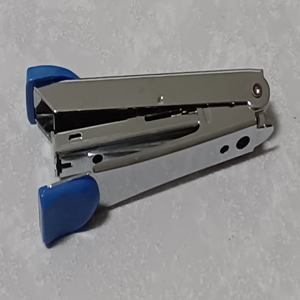

In [25]:
plotted_image = transform_image(image_colour_array_tensor)
plotted_image

<br>

## **Step 5: Convolute Step 4a**

In [26]:
input_1 = image_colour_tensor

In [27]:
conv2d_1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3), padding=1)

In [28]:
output_1 = conv2d_1(input_1)
output_1

tensor([[[ 0.3507,  0.3675,  0.3661,  ...,  0.3627,  0.3629,  0.0978],
         [ 0.5348,  0.4963,  0.5024,  ...,  0.5021,  0.4929,  0.2904],
         [ 0.5348,  0.4997,  0.5008,  ...,  0.4994,  0.4983,  0.2971],
         ...,
         [ 0.5290,  0.4895,  0.4844,  ...,  0.5073,  0.5150,  0.3059],
         [ 0.5284,  0.4885,  0.4845,  ...,  0.5044,  0.5120,  0.3078],
         [ 0.3177,  0.4566,  0.4582,  ...,  0.4700,  0.4738,  0.3698]],

        [[-0.0349,  0.1313,  0.1351,  ...,  0.1395,  0.1379, -0.0608],
         [ 0.0644,  0.1231,  0.1269,  ...,  0.1258,  0.1243,  0.0152],
         [ 0.0682,  0.1267,  0.1235,  ...,  0.1177,  0.1270,  0.0168],
         ...,
         [ 0.0634,  0.1175,  0.1161,  ...,  0.1261,  0.1254,  0.0171],
         [ 0.0666,  0.1154,  0.1156,  ...,  0.1231,  0.1225,  0.0201],
         [-0.1637, -0.1382, -0.1369,  ..., -0.1399, -0.1408,  0.0171]],

        [[ 0.0490,  0.0311,  0.0334,  ...,  0.0362,  0.0349,  0.1341],
         [-0.0752,  0.0221,  0.0285,  ...,  0

In [29]:
output_1.size()

torch.Size([8, 300, 300])

In [30]:
output_1[0]

tensor([[0.3507, 0.3675, 0.3661,  ..., 0.3627, 0.3629, 0.0978],
        [0.5348, 0.4963, 0.5024,  ..., 0.5021, 0.4929, 0.2904],
        [0.5348, 0.4997, 0.5008,  ..., 0.4994, 0.4983, 0.2971],
        ...,
        [0.5290, 0.4895, 0.4844,  ..., 0.5073, 0.5150, 0.3059],
        [0.5284, 0.4885, 0.4845,  ..., 0.5044, 0.5120, 0.3078],
        [0.3177, 0.4566, 0.4582,  ..., 0.4700, 0.4738, 0.3698]],
       grad_fn=<SelectBackward0>)

In [31]:
output_1[7]

tensor([[ 0.1064,  0.1158,  0.1162,  ...,  0.1058,  0.1050,  0.1445],
        [-0.0388, -0.1025, -0.1002,  ..., -0.0974, -0.1032,  0.0487],
        [-0.0330, -0.1041, -0.1024,  ..., -0.0976, -0.0966,  0.0514],
        ...,
        [-0.0310, -0.0954, -0.0980,  ..., -0.1007, -0.1033,  0.0578],
        [-0.0349, -0.0989, -0.0973,  ..., -0.1031, -0.1031,  0.0561],
        [ 0.0199,  0.0668,  0.0682,  ...,  0.0655,  0.0689,  0.2637]],
       grad_fn=<SelectBackward0>)

<br>

## **Step 6: Transform output tensor from Step 5 to image**

**Since there are 8 out_channels, we will display 8 images in 4 per rows for 4 rows**

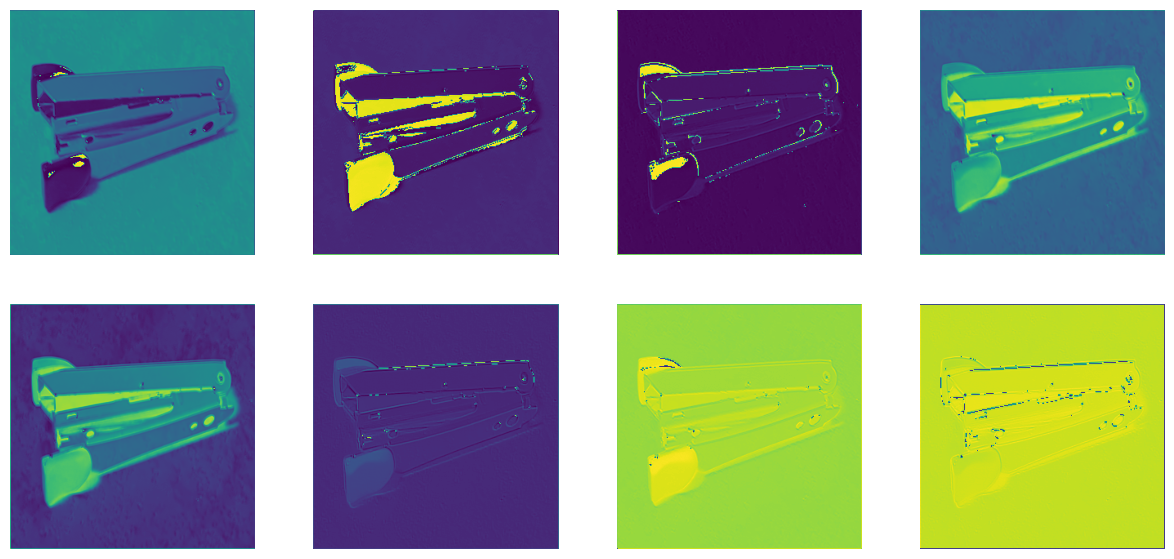

In [32]:
fig = plt.figure(figsize=(15, 7))
row_s = 2
column_s = 4
transform_image = transforms.ToPILImage()

for i in range(row_s*column_s):
    image_output_1 = transform_image(output_1[i])
    fig.add_subplot(row_s, column_s, i+1)
#    plt.imshow(image_output_1, cmap='gray')
    plt.imshow(image_output_1)
    plt.axis('off');

<br>

## **Step 7: ReLU Step 5**

In [33]:
output_2 = nnf.relu(output_1)
output_2

tensor([[[0.3507, 0.3675, 0.3661,  ..., 0.3627, 0.3629, 0.0978],
         [0.5348, 0.4963, 0.5024,  ..., 0.5021, 0.4929, 0.2904],
         [0.5348, 0.4997, 0.5008,  ..., 0.4994, 0.4983, 0.2971],
         ...,
         [0.5290, 0.4895, 0.4844,  ..., 0.5073, 0.5150, 0.3059],
         [0.5284, 0.4885, 0.4845,  ..., 0.5044, 0.5120, 0.3078],
         [0.3177, 0.4566, 0.4582,  ..., 0.4700, 0.4738, 0.3698]],

        [[0.0000, 0.1313, 0.1351,  ..., 0.1395, 0.1379, 0.0000],
         [0.0644, 0.1231, 0.1269,  ..., 0.1258, 0.1243, 0.0152],
         [0.0682, 0.1267, 0.1235,  ..., 0.1177, 0.1270, 0.0168],
         ...,
         [0.0634, 0.1175, 0.1161,  ..., 0.1261, 0.1254, 0.0171],
         [0.0666, 0.1154, 0.1156,  ..., 0.1231, 0.1225, 0.0201],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0171]],

        [[0.0490, 0.0311, 0.0334,  ..., 0.0362, 0.0349, 0.1341],
         [0.0000, 0.0221, 0.0285,  ..., 0.0337, 0.0275, 0.2353],
         [0.0000, 0.0244, 0.0229,  ..., 0.0303, 0.0258, 0.

In [34]:
output_2.size()

torch.Size([8, 300, 300])

In [35]:
output_2[0]

tensor([[0.3507, 0.3675, 0.3661,  ..., 0.3627, 0.3629, 0.0978],
        [0.5348, 0.4963, 0.5024,  ..., 0.5021, 0.4929, 0.2904],
        [0.5348, 0.4997, 0.5008,  ..., 0.4994, 0.4983, 0.2971],
        ...,
        [0.5290, 0.4895, 0.4844,  ..., 0.5073, 0.5150, 0.3059],
        [0.5284, 0.4885, 0.4845,  ..., 0.5044, 0.5120, 0.3078],
        [0.3177, 0.4566, 0.4582,  ..., 0.4700, 0.4738, 0.3698]],
       grad_fn=<SelectBackward0>)

In [36]:
output_2[7]

tensor([[0.1064, 0.1158, 0.1162,  ..., 0.1058, 0.1050, 0.1445],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0487],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0514],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0578],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0561],
        [0.0199, 0.0668, 0.0682,  ..., 0.0655, 0.0689, 0.2637]],
       grad_fn=<SelectBackward0>)

<br>

## **Step 8: Transform output tensor from Step 7 to image**

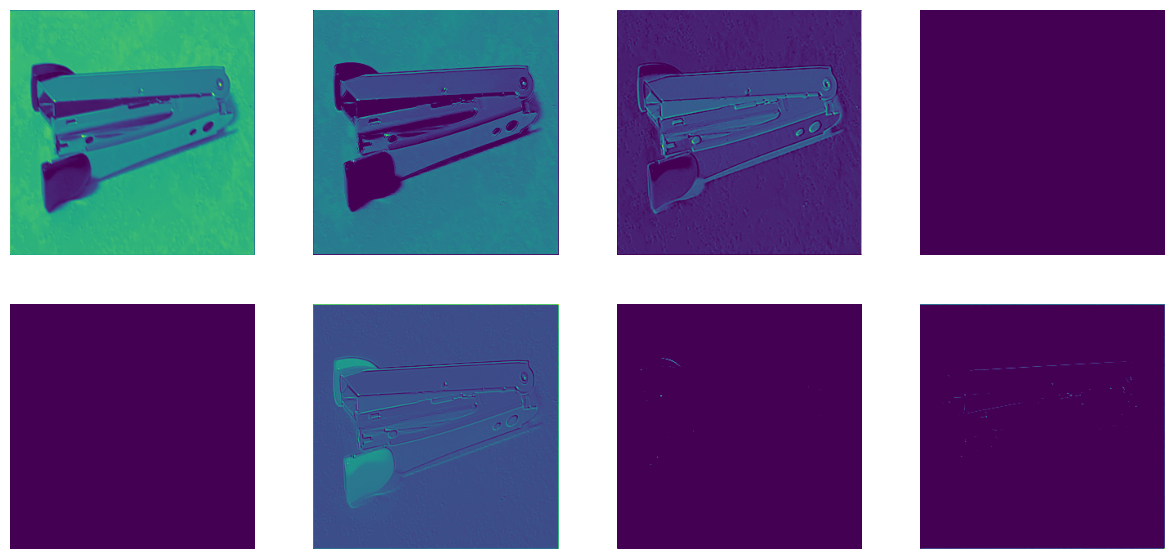

In [37]:
fig = plt.figure(figsize=(15, 7))
row_s = 2
column_s = 4

for i in range(row_s*column_s):
    image_output_2 = transform_image(output_2[i])
    fig.add_subplot(row_s, column_s, i+1)
#    plt.imshow(image_output_2, cmap='gray')
    plt.imshow(image_output_2)
    plt.axis('off');

<br>

## **Step 9: Max Pool Step 7**

In [38]:
max_pool_1 = nn.MaxPool2d(kernel_size=(2,2))

In [39]:
output_3 = max_pool_1(output_2)
output_3

tensor([[[0.5348, 0.5024, 0.5012,  ..., 0.5045, 0.5074, 0.4929],
         [0.5438, 0.5147, 0.5019,  ..., 0.5104, 0.5094, 0.5098],
         [0.5564, 0.5180, 0.5216,  ..., 0.5132, 0.4976, 0.5029],
         ...,
         [0.5349, 0.4883, 0.4933,  ..., 0.4997, 0.5124, 0.5152],
         [0.5290, 0.4844, 0.4843,  ..., 0.5065, 0.5073, 0.5170],
         [0.5284, 0.4845, 0.4825,  ..., 0.5091, 0.5044, 0.5120]],

        [[0.1313, 0.1351, 0.1401,  ..., 0.1420, 0.1395, 0.1379],
         [0.1267, 0.1314, 0.1279,  ..., 0.1300, 0.1288, 0.1270],
         [0.1265, 0.1290, 0.1327,  ..., 0.1249, 0.1288, 0.1218],
         ...,
         [0.1177, 0.1195, 0.1249,  ..., 0.1244, 0.1246, 0.1311],
         [0.1209, 0.1161, 0.1175,  ..., 0.1275, 0.1261, 0.1305],
         [0.1154, 0.1162, 0.1186,  ..., 0.1235, 0.1238, 0.1225]],

        [[0.0490, 0.0343, 0.0340,  ..., 0.0343, 0.0376, 0.2353],
         [0.0244, 0.0275, 0.0299,  ..., 0.0306, 0.0303, 0.2383],
         [0.0229, 0.0190, 0.0297,  ..., 0.0269, 0.0359, 0.

In [40]:
output_3.size()

torch.Size([8, 150, 150])

**Kernel size of (2,2) will reduce tensor size to half**

In [41]:
output_3[0]

tensor([[0.5348, 0.5024, 0.5012,  ..., 0.5045, 0.5074, 0.4929],
        [0.5438, 0.5147, 0.5019,  ..., 0.5104, 0.5094, 0.5098],
        [0.5564, 0.5180, 0.5216,  ..., 0.5132, 0.4976, 0.5029],
        ...,
        [0.5349, 0.4883, 0.4933,  ..., 0.4997, 0.5124, 0.5152],
        [0.5290, 0.4844, 0.4843,  ..., 0.5065, 0.5073, 0.5170],
        [0.5284, 0.4845, 0.4825,  ..., 0.5091, 0.5044, 0.5120]],
       grad_fn=<SelectBackward0>)

In [42]:
output_3[7]

tensor([[0.1158, 0.1162, 0.1120,  ..., 0.1127, 0.1115, 0.1445],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0557],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0548],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0563],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0578],
        [0.0668, 0.0683, 0.0703,  ..., 0.0822, 0.0686, 0.2637]],
       grad_fn=<SelectBackward0>)

<br>

## **Step 10: Transform output tensor from Step 9 to image**

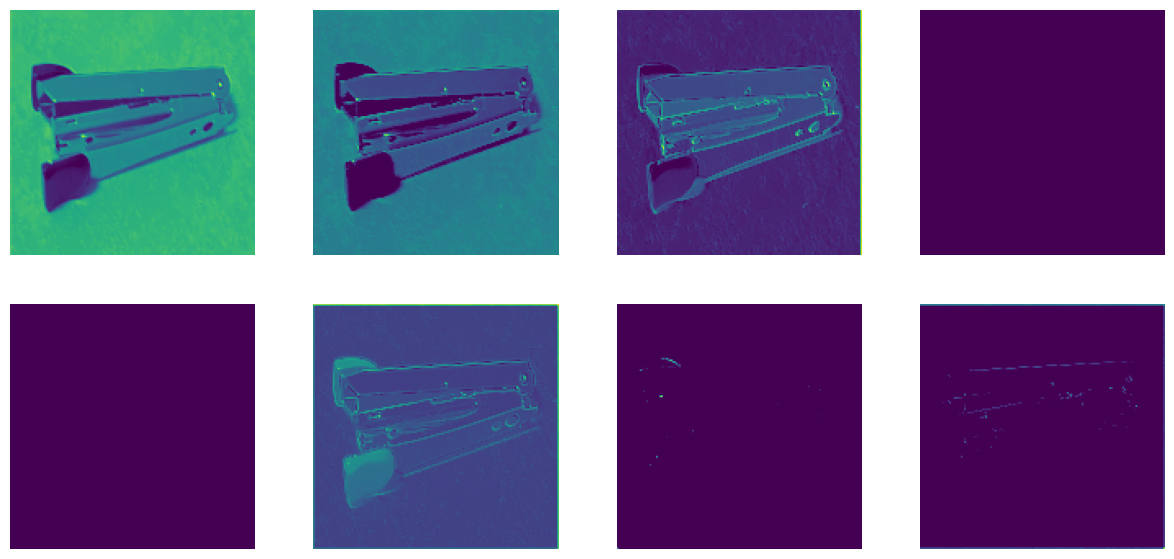

In [43]:
fig = plt.figure(figsize=(15, 7))
row_s = 2
column_s = 4

for i in range(row_s*column_s):
    image_output_2 = transform_image(output_3[i])
    fig.add_subplot(row_s, column_s, i+1)
#    plt.imshow(image_output_2, cmap='gray')
    plt.imshow(image_output_2)
    plt.axis('off');

<br>

## **Step 11: Flatten Step 9**

In [44]:
output_4 = torch.flatten(output_3)
output_4

tensor([0.5348, 0.5024, 0.5012,  ..., 0.0822, 0.0686, 0.2637],
       grad_fn=<ViewBackward0>)

In [45]:
output_4.size()

torch.Size([180000])

**From Step 9 >>> 8 x 150 x 150 = 180,000**

<br>

## **Step 12: Fully Connect Step 11 as input**

In [46]:
linear_1 = nn.Linear(180000, 32)

In [47]:
output_5 = nnf.relu(linear_1(output_4))
output_5

tensor([0.0310, 0.0000, 0.0672, 0.0000, 0.0000, 0.0000, 0.0000, 0.0988, 0.1336,
        0.0135, 0.1070, 0.0864, 0.0885, 0.0000, 0.1479, 0.0000, 0.0140, 0.1042,
        0.0000, 0.0384, 0.0000, 0.0000, 0.0082, 0.0830, 0.0056, 0.1423, 0.0000,
        0.0289, 0.0000, 0.0255, 0.0000, 0.0000], grad_fn=<ReluBackward0>)

In [48]:
output_5.size()

torch.Size([32])

<br>

## **Step 13a: Fully Connect Step 12 as output (binary class -- boat or not boat)**

In [49]:
linear_2a = nn.Linear(32, 1)

In [50]:
sigmoid_1 = nn.Sigmoid()

In [51]:
output_6a = sigmoid_1(linear_2a(output_5))
output_6a

tensor([0.4658], grad_fn=<SigmoidBackward0>)

In [52]:
output_6a.size()

torch.Size([1])

<br>

## **Step 13b: Fully Connect Step 12 as output (multi class -- boat, plane, house)**

In [53]:
linear_2b = nn.Linear(32, 3)

In [54]:
output_6b = linear_2b(output_5)
output_6b

tensor([-0.0793,  0.0352,  0.0480], grad_fn=<ViewBackward0>)

In [55]:
output_6b.size()

torch.Size([3])